<a href="https://colab.research.google.com/github/emilythestrangee/projects/blob/main/magnetic_recon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np                       #numerical computing library
import pandas as pd                      #data manipulation and analysis libraries and provide visual representations of the magnetic field data collected by the ACE spacecraft)
from matplotlib import pyplot as plt
import pywt                              #wavelet analysis
from datetime import datetime, timedelta

In [ ]:
new=[]
sat=input("Satellite Name (ACE/WIND/DSCOVR): ")
file="/content/"+sat.upper()+"_BZ_DATA.txt"
f=open(file,"r")
freq=0
for i in f.readlines():
    new.append(i.split())

if sat.upper()=="ACE":
    year=input("Enter a year (2016-2020): ")
elif sat.upper()=="DSCOVR":
    year=input("Enter a year (2016-2019): ")
else:
    year=input("Enter a year (2019-2023): ")

for i in new:
    if i[0]==year and i[-1][0]=="-":
        freq+=1
print("Frequency Of Magnetic Reconnection Occurrences In",year,": ",freq)

Satellite Name (ACE/WIND/DSCOVR): ACE
Enter a year (2016-2020): 2018
Frequency Of Magnetic Reconnection Occurrences In 2018 :  22705


In [3]:
file1=open("/content/ACE_BZ_DATA.txt","r")
y1=[]
doy1=[]
bz_values1=[]
for i in file1.readlines():
  y1.append(i.split()[0])
  doy1.append(i.split()[1])
  bz_values1.append(float(i.split()[-1]))

file2=open("/content/DSCOVR_BZ_DATA.txt","r")
y2=[]
doy2=[]
bz_values2=[]
for i in file2.readlines():
  y2.append(i.split()[0])
  doy2.append(i.split()[1])
  bz_values2.append(float(i.split()[-1]))

file3=open("/content/WIND_BZ_DATA.txt","r")
y3=[]
doy3=[]
bz_values3=[]
for i in file3.readlines():
  y3.append(i.split()[0])
  doy3.append(i.split()[1])
  bz_values3.append(float(i.split()[-1]))

df1 = pd.DataFrame({'Bz': bz_values1,'Year': y1,'DOY':doy1}) #ACE
df2 = pd.DataFrame({'Bz': bz_values2,'Year': y2,'DOY':doy2}) #DSCOVR
df3 = pd.DataFrame({'Bz': bz_values3,'Year': y3,'DOY':doy3}) #WIND

df1['Bz']=df1['Bz'].replace(9999.99,None)
df2['Bz']=df2['Bz'].replace(9999.99,None)
df3['Bz']=df3['Bz'].replace(9999.99,None)

def add_date_month_col(df):
    df['Year'] = pd.to_numeric(df['Year']) #convert from str to numeric values
    df['DOY'] = pd.to_numeric(df['DOY'])   #convert from str to numeric values

    def doy_to_date(year, doy):            #convert day of year to DD/MMM format
        reference_date = datetime(int(year), 1, 1)   #reference date- 1st Jan
        target_date = reference_date + timedelta(days=int(doy) - 1)
        return target_date.strftime("%d/%b")

    df['Date_Month'] = df.apply(lambda row: doy_to_date(row['Year'], row['DOY']), axis=1) #new column- date_month

    return df

res_df1 = add_date_month_col(df1)
res_df2 = add_date_month_col(df2)
res_df3 = add_date_month_col(df3)

Enter a year: 2023
Enter satellite name: WIND


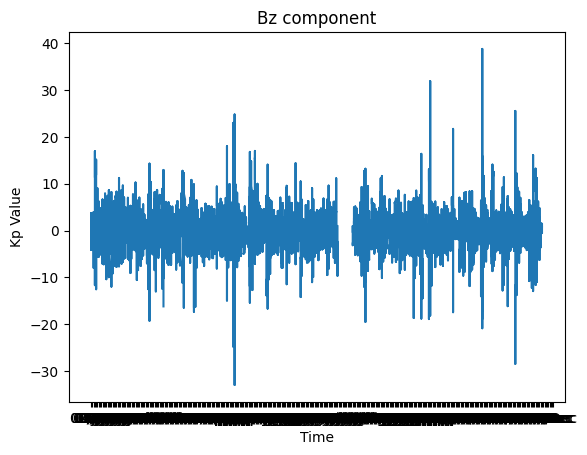

In [5]:
#rendering plots for Bz vs. Time based on user input year and satellite name
year=int(input("Enter a year: "))
sat=input("Enter satellite name: ")

if sat.upper() == "WIND" and year in df3['Year'].unique():
    filtered_df = df3[(df3['Year'] == year)]
    plt.figure()
    plt.plot(filtered_df['Date_Month'], filtered_df['Bz'])
    plt.title("Bz component")
    plt.ylabel('Kp Value')
    plt.xlabel('Time')
    plt.show()
elif sat.upper() == "ACE" and year in df1['Year'].unique():
    filtered_df = df1[(df1['Year'] == year)]
    fig = go.Figure()
    fig.add_scatter(x=filtered_df['Date_Month'], y=filtered_df['Bz'], mode='lines')
    fig.update_xaxes(title_text='Time')
    fig.update_yaxes(title_text='Bz')
    fig.update_layout(title='Bz component', showlegend=False)
    fig.update_xaxes(showgrid=True, tickangle=55)
    fig.update_yaxes(showgrid=True)
    fig.show()
elif sat.upper() == "DSCOVR" and year in df2['Year'].unique():
    filtered_df = df2[(df2['Year'] == year)]
    fig = go.Figure()
    fig.add_scatter(x=filtered_df['Date_Month'], y=filtered_df['Bz'], mode='lines')
    fig.update_xaxes(title_text='Time')
    fig.update_yaxes(title_text='Bz')
    fig.update_layout(title='Bz component', showlegend=False)
    fig.update_xaxes(showgrid=True, tickangle=55)
    fig.update_yaxes(showgrid=True)
    fig.show()
else:
  print("Error: Invalid Satellite Name...")

Enter a year: 2023
Enter satellite name: WIND


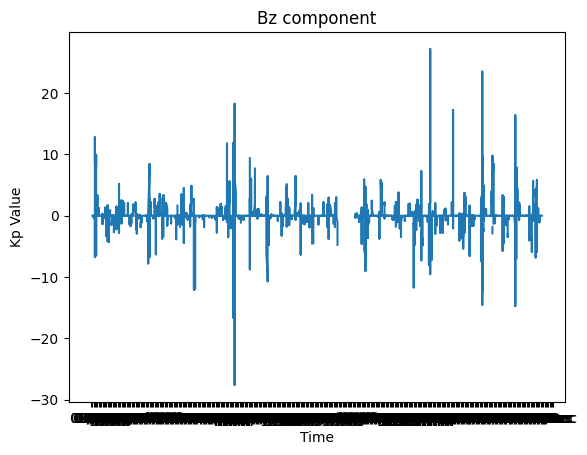

In [6]:
#rendering plots after denoising

def bz_denoiser(df, threshold):
  noise=df['Bz']
  coeffs=pywt.wavedec(noise,'db1',level=4) #multi-level wavelet decomposition to break down signal(a set of coeffs) into different frequency components
  threshold1=[pywt.threshold(c,threshold,mode='soft')for c in coeffs] #'soft' thresholding sets coefficients with magnitude less than the threshold to zero and shrinks (softens) the remaining coefficients toward zero
  return pywt.waverec(threshold1,'db1') #signal reconstruction of coeffs that went through thresholding

year1=int(input("Enter a year: "))
sat1=input("Enter satellite name: ")

if sat1.upper() == "WIND" and year1 in df3['Year'].unique():
    filtered_df = df3[(df3['Year'] == year1)]
    denoised=bz_denoiser(filtered_df, 15)
    filtered_df = df3[(df3['Year'] == year)]
    plt.figure()
    plt.plot(filtered_df['Date_Month'], denoised)
    plt.title("Bz component")
    plt.ylabel('Kp Value')
    plt.xlabel('Time')
    plt.show()
elif sat1.upper() == "ACE" and year1 in df1['Year'].unique():
    filtered_df = df1[(df1['Year'] == year1)]
    denoised=bz_denoiser(filtered_df, 15)
    fig = go.Figure()
    fig.add_scatter(x=filtered_df['Date_Month'], y=denoised, mode='lines')
    fig.update_xaxes(title_text='Time')
    fig.update_yaxes(title_text='Bz')
    fig.update_layout(title='Bz component', showlegend=False)
    fig.update_xaxes(showgrid=True, tickangle=55)
    fig.update_yaxes(showgrid=True)
    fig.show()
elif sat1.upper() == "DSCOVR" and year1 in df2['Year'].unique():
    filtered_df = df2[(df2['Year'] == year1)]
    denoised=bz_denoiser(filtered_df, 15)
    fig = go.Figure()
    fig.add_scatter(x=filtered_df['Date_Month'], y=denoised, mode='lines')
    fig.update_xaxes(title_text='Time')
    fig.update_yaxes(title_text='Bz')
    fig.update_layout(title='Bz component', showlegend=False)
    fig.update_xaxes(showgrid=True, tickangle=55)
    fig.update_yaxes(showgrid=True)
    fig.show()
else:
  print("Error: Invalid Satellite Name...")